# Titanic survival predict1

In [1]:
#just remind the location of sklearn
import sys
print(sys.path)
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')
print(sys.path)

['', '/Users/zp', '/anaconda3/lib/python37.zip', '/anaconda3/lib/python3.7', '/anaconda3/lib/python3.7/lib-dynload', '/anaconda3/lib/python3.7/site-packages', '/anaconda3/lib/python3.7/site-packages/aeosa', '/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/zp/.ipython']
['', '/Users/zp', '/anaconda3/lib/python37.zip', '/anaconda3/lib/python3.7', '/anaconda3/lib/python3.7/lib-dynload', '/anaconda3/lib/python3.7/site-packages', '/anaconda3/lib/python3.7/site-packages/aeosa', '/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/zp/.ipython', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages']


In [165]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
%matplotlib inline

# read in data

In [166]:
data_train = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/Titanic/train.csv')
data_test = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/Titanic/test.csv')
print(data_train.head())
print('test data')
print(data_test.head())
print(data_train.info())
print(data_train.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
te


# explore the data

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

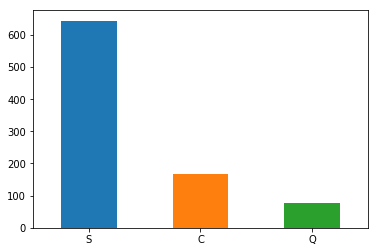

In [18]:
data_train['Embarked'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

In [38]:
# data_train[data_train.Age<3]
# data_train.Age.median()
print(data_train.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [51]:
data_train['Age'] = data_train['Age'].fillna( int(data_train['Age'].median()) ) 
data_train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

# try different algorithms

# 1. Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
# from sklearn.cross_validation import KFold  this will be removed in future
# help(KFold)
print(data_train.columns.tolist())
predictors = ['Pclass','Age','SibSp','Parch','Fare']
alg = LinearRegression()
kf = KFold(n_splits=3, shuffle=False, random_state=1)

predictions = []
for train, test in kf.split(data_train):
    print(np.shape(train), np.shape(test))
    train_predictors = data_train[predictors].iloc[train,:]
    train_target = data_train['Survived'].iloc[train,]
#     print(train_target[:5])
    alg.fit( train_predictors, train_target )
    test_predictions = alg.predict( data_train[predictors].iloc[test,:] )
    print(np.shape(test_predictions))
    predictions.append(test_predictions)

print(np.shape(predictions))
predictions = np.concatenate(predictions,axis=0)
print(predictions[:10])
print(len(predictions))
predictions[predictions>0.5] = 1
predictions[predictions<=0.5] = 0
print(predictions[:10])
print(data_train.loc[:5,'Survived'])
accuracy = float(sum(predictions==data_train['Survived']) ) / len(predictions)
print('accuracy is: {:.3f}'.format(accuracy))
# sum(predictions==data_train['Survived']) / len(predictions)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
(594,) (297,)
(297,)
(594,) (297,)
(297,)
(594,) (297,)
(297,)
(3, 297)
[0.2233442  0.64716068 0.22381187 0.65781892 0.15821019 0.20954606
 0.54764008 0.35828968 0.29636233 0.54633321]
891
[0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
0    0
1    1
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64
accuracy is: 0.704


In [100]:
# help(np.concatenate)

In [103]:
a = [2,3,5]
print(np.shape(a))
print(len(a))
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
t = np.concatenate([a,b], axis=0)
# np.concatenate([a,b.T], axis=1)
# pd.DataFrame( a+ b)
print(t)
c = [[1,2],[3,4]]
t = np.concatenate(c,axis=0)
print(t)
t[t>2]


(3,)
3
[[1 2]
 [3 4]
 [5 6]]
[1 2 3 4]


array([3, 4])

# 2.Logistic Regression

In [154]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
LogRegAlg = LogisticRegression(random_state=1)
re = LogRegAlg.fit( data_train[predictors], data_train.Survived )

scores = model_selection.cross_val_score( LogRegAlg, data_train[predictors], data_train.Survived,cv=3 )
print(scores)
print('The Logistic Regression accuracy is: {}'.format(scores.mean()))
print(len(scores))

[0.66329966 0.71717172 0.71717172]
The Logistic Regression accuracy is: 0.6992143658810326
3


In [128]:
# help(model_selection.cross_val_score)


# add two features

In [180]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [144]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data_train.Sex)
# le.transform(data_train.Sex)
# help(LabelEncoder)
# le.transform(data_train.Embarked)

LabelEncoder()

In [179]:
data_train.loc[ data_train['Sex']=='male','Sex' ] = 0
data_train.loc[ data_train['Sex']=='female','Sex' ] = 1
data_train.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [178]:
data_train['Embarked'] = data_train['Embarked'].fillna('S')
data_train.loc[ data_train['Embarked'] == 'S', 'Embarked'] = 0
data_train.loc[ data_train['Embarked'] == 'C', 'Embarked'] = 1
data_train.loc[ data_train['Embarked'] == 'Q', 'Embarked'] = 2


/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [155]:
predictors = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]  
LogRegAlg = LogisticRegression(random_state=1)
re = LogRegAlg.fit( data_train[predictors], data_train.Survived )
scores = model_selection.cross_val_score(re, data_train[predictors], data_train.Survived,cv=3)
print('Accuracy is: ', scores.mean())


Accuracy is:  0.7878787878787877


In [163]:
# data_test.info()
data_test['Age'] = data_test['Age'].fillna( data_test['Age'].median() )
data_test['Fare'] = data_test['Fare'].fillna( data_test['Fare'].max() ) 

data_test.loc[data_test["Sex"] == "male","Sex"] = 0
data_test.loc[data_test["Sex"] == "female","Sex"] = 1
# #缺失值用最多的S进行填充
data_test["Embarked"] = data_test["Embarked"].fillna('S') 
# #地点用0,1,2
data_test.loc[data_test["Embarked"] == "S","Embarked"] = 0    
data_test.loc[data_test["Embarked"] == "C","Embarked"] = 1
data_test.loc[data_test["Embarked"] == "Q","Embarked"] = 2

test_features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"] 

# data_test['Survived'] = -1
data_test['Survived'] = LogRegAlg.predict( data_test[test_features] )
data_test.Survived[:20]

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    0
11    0
12    1
13    0
14    1
15    1
16    0
17    0
18    1
19    1
Name: Survived, dtype: int64

In [157]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3.Randomforest

In [181]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

predictors=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

alg = RandomForestClassifier(random_state=1, n_estimators=10,min_samples_split=2, min_samples_leaf=1)
kf = model_selection.KFold(n_splits=3, shuffle=False, random_state=1)
print(kf)
scores = model_selection.cross_val_score(alg,data_train[predictors],data_train['Survived'], cv=kf)
print('The accuracy is: ',scores.mean())

KFold(n_splits=3, random_state=1, shuffle=False)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [174]:
data_train[predictors].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [4]:
 np.linspace(-10, 10, num=20)

NameError: name 'np' is not defined

In [6]:
from sklearn.ensemble import RandomForestClassifier


# Titanic2

In [8]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
help(sns.facetGrid)

AttributeError: module 'seaborn' has no attribute 'facetGrid'

In [14]:
help(np.size)

Help on function size in module numpy.core.fromnumeric:

size(a, axis=None)
    Return the number of elements along a given axis.
    
    Parameters
    ----------
    a : array_like
        Input data.
    axis : int, optional
        Axis along which the elements are counted.  By default, give
        the total number of elements.
    
    Returns
    -------
    element_count : int
        Number of elements along the specified axis.
    
    See Also
    --------
    shape : dimensions of array
    ndarray.shape : dimensions of array
    ndarray.size : number of elements in array
    
    Examples
    --------
    >>> a = np.array([[1,2,3],[4,5,6]])
    >>> np.size(a)
    6
    >>> np.size(a,1)
    3
    >>> np.size(a,0)
    2



In [15]:
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
title_Dict.update(dict.fromkeys(['Don','Sir','the Countess','Dona','Lady'],'Royalty'))
title_Dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
title_Dict.update(dict.fromkeys(['Male','Miss'],'Miss'))
title_Dict.update(dict.fromkeys(['Mr'],'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))

In [16]:
print(title_Dict)

{'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer', 'Dr': 'Officer', 'Rev': 'Officer', 'Don': 'Royalty', 'Sir': 'Royalty', 'the Countess': 'Royalty', 'Dona': 'Royalty', 'Lady': 'Royalty', 'Mme': 'Mrs', 'Ms': 'Mrs', 'Mrs': 'Mrs', 'Male': 'Miss', 'Miss': 'Miss', 'Mr': 'Mr', 'Master': 'Master', 'Jonkheer': 'Master'}


In [17]:
pd.factorize(pd.Series(list('abcaadedffg')))

(array([0, 1, 2, 0, 0, 3, 4, 3, 5, 5, 6]),
 Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object'))

In [26]:

df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'prize', 'class label']
print(df)
print(pd.get_dummies(df))
print(pd.factorize(df['size'])[0])

   color size  prize class label
0  green    M   10.1      class1
1    red    L   13.5      class2
2   blue   XL   15.3      class1
   prize  color_blue  color_green  color_red  size_L  size_M  size_XL  \
0   10.1           0            1          0       0       1        0   
1   13.5           0            0          1       1       0        0   
2   15.3           1            0          0       0       0        1   

   class label_class1  class label_class2  
0                   1                   0  
1                   0                   1  
2                   1                   0  
[0 1 2]


In [27]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
    Fit and plot a univariate or bivariate kernel density estimate.
    
    Parameters
    ----------
    data : 1d array-like
        Input data.
    data2: 1d array-like, optional
        Second input data. If present, a bivariate KDE will be estimated.
    shade : bool, optional
        If True, shade in the area under the KDE curve (or draw with filled
        contours when data is bivariate).
    vertical : bool, optional
        If True, density is on x-axis.
    kernel : {'gau' | 'cos' | 'biw' | 'epa' | 'tri' | 'triw' }, optional
        Code for shape of kernel to fit with. Bivariate KDE can only use
        gaussian kernel.
    bw : {'scott' | 'silverman' | scalar | pair of scalars }, optional
     

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


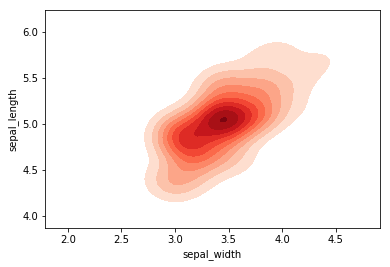

In [30]:
iris = sns.load_dataset("iris")
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length, cmap="Reds", shade=True, shade_lowest=False)

In [31]:
help(np.percentile)

Help on function percentile in module numpy.lib.function_base:

percentile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
    Compute the qth percentile of the data along the specified axis.
    
    Returns the qth percentile(s) of the array elements.
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    q : array_like of float
        Percentile or sequence of percentiles to compute, which must be between
        0 and 100 inclusive.
    axis : {int, tuple of int, None}, optional
        Axis or axes along which the percentiles are computed. The
        default is to compute the percentile(s) along a flattened
        version of the array.
    
        .. versionchanged:: 1.9.0
            A tuple of axes is supported
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expect

In [32]:
from sklearn.metrics import zero_one_loss
help(zero_one_loss)

Help on function zero_one_loss in module sklearn.metrics.classification:

zero_one_loss(y_true, y_pred, normalize=True, sample_weight=None)
    Zero-one classification loss.
    
    If normalize is ``True``, return the fraction of misclassifications
    (float), else it returns the number of misclassifications (int). The best
    performance is 0.
    
    Read more in the :ref:`User Guide <zero_one_loss>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, optional (default=True)
        If ``False``, return the number of misclassifications.
        Otherwise, return the fraction of misclassifications.
    
    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    loss : float o

In [35]:
a = [1,2,3,4]
b = [2,1,3,4]
zero_one_loss(a,b,normalize=False)

2

In [49]:
import lightgbm

OSError: dlopen(/anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [47]:
a = ['a','b','c']
for i,v in enumerate(a):
    print(i,v)

0 a
1 b
2 c


In [43]:
import xgboost